# Investigando os dados do Titanic

In [18]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#### Importanto dados e leitura preliminar

In [19]:
df = pd.read_csv('titanic-data-6.csv',  index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas a serem feitas a partir da observação de dados até aqui:

* Qual a proporção de passageiros x sobreviventes?
* Como a classe influenciou nas chances de sobrevivência do acidente?
* Há mais sobreviventes homens ou mulheres?
* Qual a média de idade dos sobreviventes?

#### Data Wrangling

In [31]:
# verificando se não faltam dados em alguma coluna
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
Survived            891 non-null int64
Pclass              891 non-null int64
Sex                 891 non-null object
Age                 714 non-null float64
Sibling/Spouse      891 non-null int64
Parents/Children    891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 48.7+ KB


#### Faltam itens na coluna 'Age', é preciso resolver isso.
A solução, conforme apresentada em exercícios anteriores, é pegar a média de valores da coluna e preencher os espaços vazios com esse valor.

In [35]:
# preenchendo com o valor médio da coluna nas células em branco
mean_age = dfc['Age'].mean()
dfc['Age'].fillna(mean_age, inplace=True)

# verificando novamente se os dados estão OK
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
Survived            891 non-null int64
Pclass              891 non-null int64
Sex                 891 non-null object
Age                 891 non-null float64
Sibling/Spouse      891 non-null int64
Parents/Children    891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 48.7+ KB


### Limpeza de dados
#### Quais dados podem ser eliminados por serem irrelevantes para o estudo de caso?
Após analisar as colunas, parece-me que os dados mais relevantes são sobreviventes por classe, gênero e idade – dadas as perguntas feitas. Dados como número do tíquete, valor da passagem, número da cabine e porto de embarque podem ser descartados.

In [37]:
# limpando dados que julgo desnecessários para a análise de sobreviventes
dfc = df.drop(['Ticket', 'Fare', 'Cabin', 'Embarked', 'Name'], axis=1)

# renomeando colunas para uma melhor visualização
dfc.rename(columns={'SibSp': 'Sibling/Spouse', 'Parch': 'Parents/Children'}, inplace=True)
dfc.head()

,Survived,Pclass,Sex,Age,Sibling/Spouse,Parents/Children
PassengerId,,,,,,
1,0,3,male,22.0,1,0
2,1,1,female,38.0,1,0
3,1,3,female,26.0,0,0
4,1,1,female,35.0,1,0
5,0,3,male,35.0,0,0


### Qual a proporção de passageiros x sobreviventes?

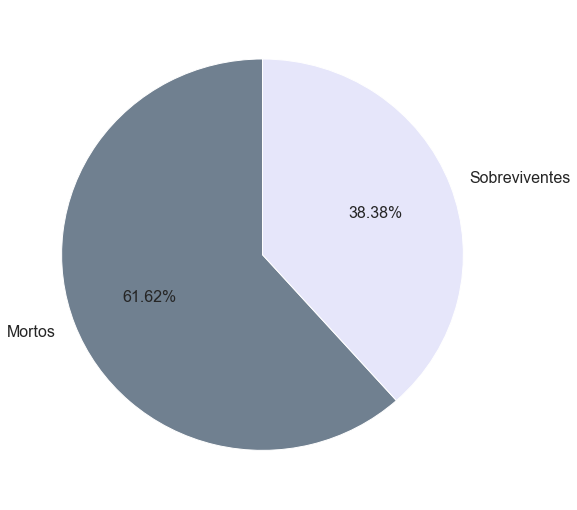

In [38]:
# definindo as variáveis para total de passageiros e sobreviventes
passageiros = dfc.shape[0]
sobreviventes = dfc.query('Survived == 1')['Survived'].count()
mortos = dfc.query('Survived == 0')['Survived'].count()

# Pie chart
labels = 'Mortos', 'Sobreviventes'
sizes = [mortos, sobreviventes]
colors= ['slategray', 'lavender']
plt.rcParams['font.size'] = 16.0

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors,
       startangle=90)
plt.show()

#### Reposta: A taxa de sobreviventes do naufrágio do Titanic foi de pouco mais de 38%.

### Qual o percentual de passageiros por classe?

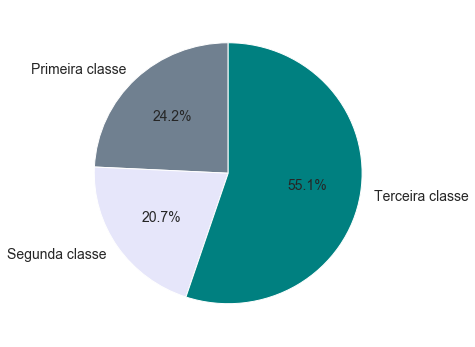

In [7]:
# análise preliminar
fclass = dfc.query('Pclass == 1')['Pclass'].count()
sclass = dfc.query('Pclass == 2')['Pclass'].count()
tclass = dfc.query('Pclass == 3')['Pclass'].count()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Primeira classe', 'Segunda classe', 'Terceira classe'
sizes = [fclass, sclass, tclass]
colors= ['slategray', 'lavender', 'teal']
plt.rcParams['font.size'] = 14.0

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.show();

### Em relação ao total de sobreviventes, qual classe de passageiros teve mais sobreviventes?

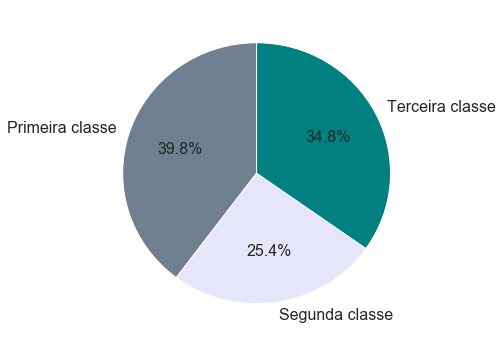

In [39]:
# análise preliminar
sfclass = dfc.query('Survived == 1 and Pclass == 1')['Survived'].count()
ssclass = dfc.query('Survived == 1 and Pclass == 2')['Survived'].count()
stclass = dfc.query('Survived == 1 and Pclass == 3')['Survived'].count()

fclass = dfc.query('Survived == 0 and Pclass == 1')['Survived'].count()
sclass = dfc.query('Survived == 0 and Pclass == 2')['Survived'].count()
tclass = dfc.query('Survived == 0 and Pclass == 3')['Survived'].count()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
clabels = 'Primeira classe', 'Segunda classe', 'Terceira classe'
ssizes = [sfclass, ssclass, stclass]
dsizes = [fclass, sclass, stclass]
colors= ['slategray', 'lavender', 'teal']

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(ssizes, labels=clabels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.show()

#### Resposta: podemos ver, em uma primeira análise, que os passageiros da primeira classe foram os que mais se salvaram, seguidos, respectivamente, por terceira e segunda classes.

### Proporção sobreviventes por classe
Em relação ao seu respectivo número de passageiros, qual classe teve mais sobreviventes?

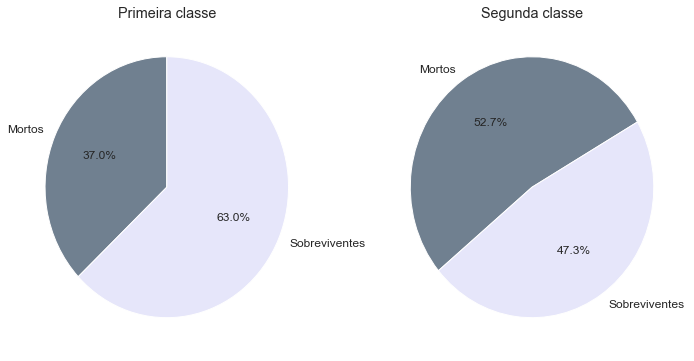

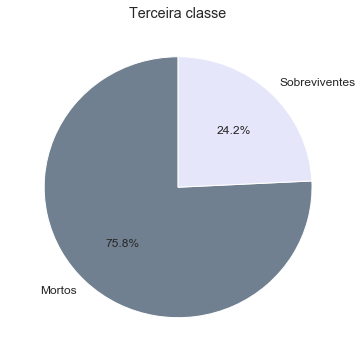

In [40]:
# definindo a relação passageiro x sobrevivente de cada classe
# mortos por classe
dfclass = dfc.query('Pclass == 1 and Survived == 0')['Survived'].count()
dsclass = dfc.query('Pclass == 2 and Survived == 0')['Survived'].count()
dtclass = dfc.query('Pclass == 3 and Survived == 0')['Survived'].count()

# sobreviventes por classe
sfclass = dfc.query('Pclass == 1 and Survived == 1')['Survived'].count()
ssclass = dfc.query('Pclass == 2 and Survived == 1')['Survived'].count()
stclass = dfc.query('Pclass == 3 and Survived == 1')['Survived'].count()


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Mortos', 'Sobreviventes'
classeum = [dfclass, sfclass]
classedois = [dsclass, ssclass]
classetres = [dtclass, stclass]
colors= ['slategray', 'lavender', 'teal', 'cadetblue']
plt.rcParams['font.size'] = 12.0

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.pie(classeum, labels=labels, autopct='%1.1f%%', colors=colors,
       startangle=90)
ax2.pie(classedois, labels=labels, autopct='%1.1f%%', colors=colors,
       startangle=30)
ax1.set_title('Primeira classe')
ax2.set_title('Segunda classe')

fig2, (ax3) = plt.subplots(1, figsize=(6,6))
ax3.pie(classetres, labels=labels, autopct='%1.1f%%', colors=colors,
       startangle=90)
ax3.set_title('Terceira classe')

plt.show()

#### A primeira classe teve um número maior de sobreviventes em relação a seu número total de passageiros.

### Qual  classe tem um número maior de sobreviventes por gênero?

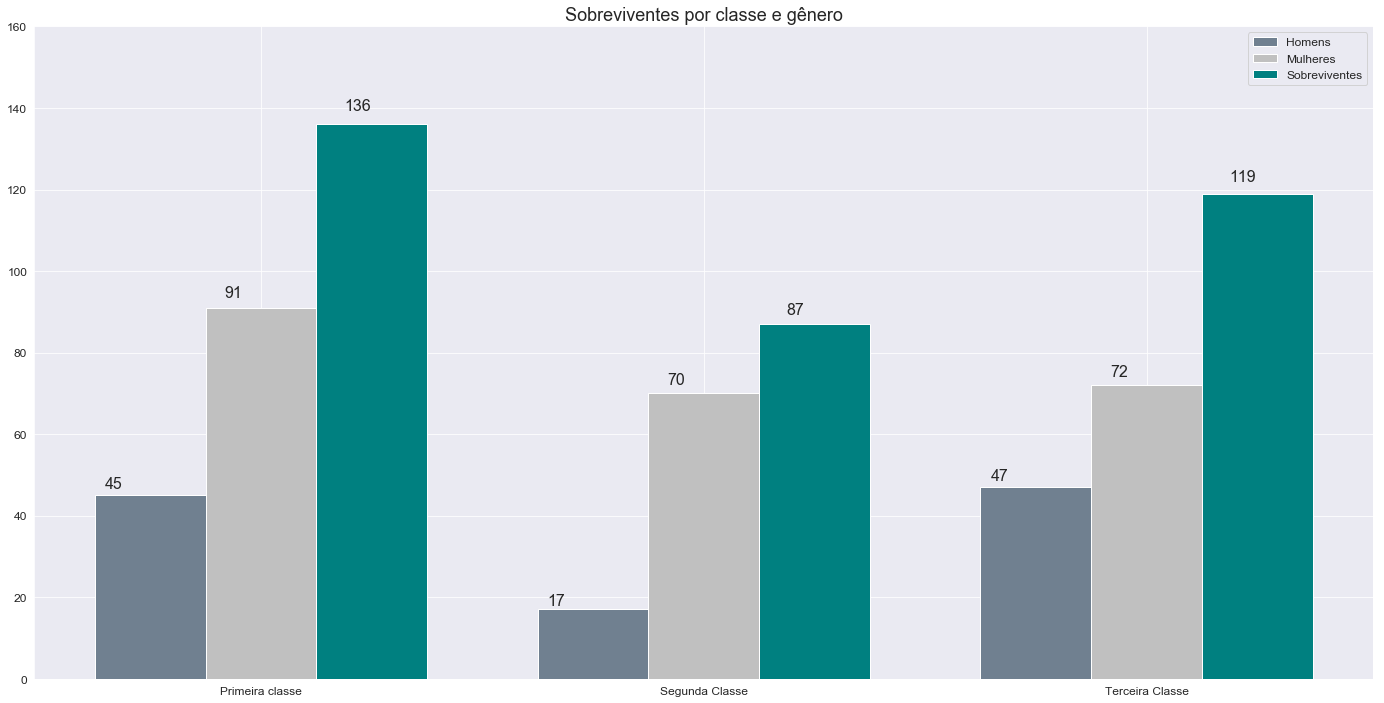

In [41]:
# sobreviventes totais de cada classe
sobreviventes = dfc.query('Survived == 1')['Survived'].count()

# contando o número de homens de cada classe
mfclass = dfc.query('Survived == 1 and Pclass == 1 and Sex == "male"')['Survived'].count()
msclass = dfc.query('Survived == 1 and Pclass == 2 and Sex == "male"')['Survived'].count()
mtclass = dfc.query('Survived == 1 and Pclass == 3 and Sex == "male"')['Survived'].count()

# contando o número de mulheres de cada classe
wfclass = dfc.query('Survived == 1 and Pclass == 1 and Sex == "female"')['Survived'].count()
wsclass = dfc.query('Survived == 1 and Pclass == 2 and Sex == "female"')['Survived'].count()
wtclass = dfc.query('Survived == 1 and Pclass == 3 and Sex == "female"')['Survived'].count()

fclass = dfc.query('Survived == 1 and Pclass == 1')['Survived'].count()
sclass = dfc.query('Survived == 1 and Pclass == 2')['Survived'].count()
stclass = dfc.query('Survived == 1 and Pclass == 3')['Survived'].count()

men_means = (mfclass, msclass, mtclass)
women_means = (wfclass, wsclass, wtclass)
survs = (fclass, sclass, stclass)


ind = np.arange(len(survs))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(24,12))
homens = ax.bar(ind - width, men_means, width, 
                color='slategray', label='Homens')
mulheres = ax.bar(ind, women_means, width,
                color='silver', label='Mulheres')
sobreviveram = ax.bar(ind + width, survs, width,
               color='teal', label="Sobreviventes")


ax.set_title('Sobreviventes por classe e gênero', fontsize=18)
ax.set_xticks(ind)
ax.set_xticklabels(('Primeira classe', 'Segunda Classe', 'Terceira Classe'))
ax.set_yticks( np.arange(0,180, 20) )
ax.legend(fontsize=16)

def ticker(barra, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    for bar in barra:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()*width, 1.02*height,
                '{}'.format(height),ha=ha[xpos], va='bottom', fontsize=16)

ticker(homens, 'left')
ticker(mulheres)
ticker(sobreviveram,'right')
plt.legend()
plt.show()

####  Resposta: Há mais homens sobreviventes na terceira classe e mulheres sobreviventes na primeira classe.
No geral, há mais mulheres que sobreviveram ao naufrágio.


### Qual a média de idade dos sobreviventes?

Para essa parte da análise foram definidas idades-limite para cada categoria. A resposta será baseada na faixa etária e não na idade dos sobreviventes.
* De 0 a 12 anos = criança
* De 13 a 18 anos = adolescente
* De 19 a 54 anos = adulto
* Acima de 55 anos = idoso

In [42]:
# análise prévia das médias de idade
dfc.Age.describe().astype(int) # converter em inteiros facilita a visualização

count    714
mean      29
std       14
min        0
25%       20
50%       28
75%       38
max       80
Name: Age, dtype: int64

In [43]:
bins = [0,12,18,54,80]
bin_label = ['criança', 'adolescente', 'adulto', 'idoso']
dfc['Etaria'] = pd.cut(dfc['Age'], bins, labels=bin_label)

### Analisando número passageiros por faixa etária

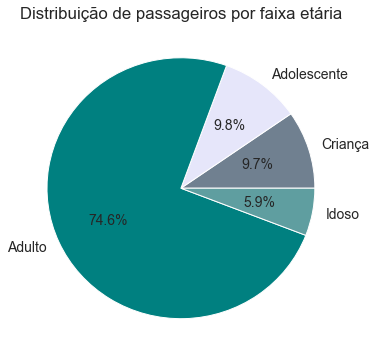

In [44]:
# definindo faixas de idade e suas variáveis correspondentes
crianca = dfc.query('Etaria == "criança"')['Survived'].count()
adolescente = dfc.query('Etaria == "adolescente"')['Survived'].count()
adulto = dfc.query('Etaria == "adulto"')['Survived'].count()
idoso = dfc.query('Etaria == "idoso"')['Survived'].count()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Criança', 'Adolescente', 'Adulto', 'Idoso'
sizes = [crianca, adolescente, adulto, idoso]
colors= ['slategray', 'lavender', 'teal', 'cadetblue']
plt.rcParams['font.size'] = 14.0

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribuição de passageiros por faixa etária')
plt.show()

### Qual a faixa etária com mais sobreviventes?

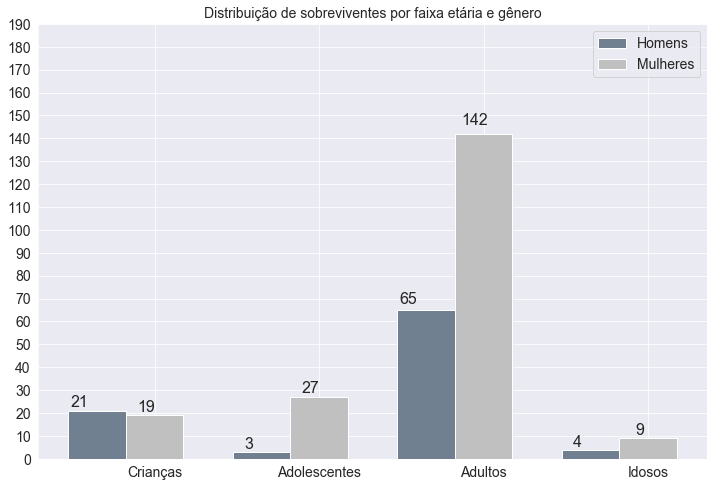

In [49]:
# definindo faixas de idade e suas variáveis correspondentes
wcrianca = dfc.query('Etaria == "criança" and Survived == 1 and Sex == "female"')['Survived'].count()
wadolescente = dfc.query('Etaria == "adolescente" and Survived == 1 and Sex == "female"')['Survived'].count()
wadulto = dfc.query('Etaria == "adulto" and Survived == 1 and Sex == "female"')['Survived'].count()
widoso = dfc.query('Etaria == "idoso" and Survived == 1 and Sex == "female"')['Survived'].count()
wsizes = [wcrianca, wadolescente, wadulto, widoso]

mcrianca = dfc.query('Etaria == "criança" and Survived == 1 and Sex == "male"')['Survived'].count()
madolescente = dfc.query('Etaria == "adolescente" and Survived == 1 and Sex == "male"')['Survived'].count()
madulto = dfc.query('Etaria == "adulto" and Survived == 1 and Sex == "male"')['Survived'].count()
midoso = dfc.query('Etaria == "idoso" and Survived == 1 and Sex == "male"')['Survived'].count()
msizes = [mcrianca, madolescente, madulto, midoso]

####

ind = np.arange(len(wsizes))  # the x locations for the groups
width = 0.35  # the width of the bars
colors= ['slategray', 'lavender', 'teal', 'cadetblue']

fig, ax = plt.subplots(figsize=(12,8))
mulheres = ax.bar(ind - width, msizes, width, 
                color='slategray', label='Homens')
homens = ax.bar(ind, wsizes, width,
                color='silver', label='Mulheres')
# sobreviveram = ax.bar(ind + width, survs, width,
#                color='teal', label="Sobreviventes")


ax.set_title('Distribuição de sobreviventes por faixa etária e gênero', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Crianças', 'Adolescentes', 'Adultos', 'Idosos'))
ax.set_yticks( np.arange(0,200, 10) )
ax.legend(fontsize=14)

def ticker(barra, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    for bar in barra:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()*width, 1.02*height,
                '{}'.format(height),ha=ha[xpos], va='bottom', fontsize=16)

ticker(mulheres, 'left')
ticker(homens)
plt.legend()
plt.show()

#### Resposta: os adultos (classificados aqui pela faixa de idade entre 18 e 54 anos) foram os que mais sobreviveram ao naufrágio.

### Referências:
* Matplotlib pie chart: https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
* Multple bars: https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
* Y intervals: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html?highlight=yticks#matplotlib.pyplot.yticks